<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.951 - Tipologia i cicle de vida de les dades</p>
<p style="margin: 0; text-align:right;">2017-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;"><b>Autors:</b> Joan Bonnín i Jose L. Dolz</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Pràctica 2: Neteja i validació de les dades

## Descripció 
L’objectiu d’aquesta activitat serà el tractament d’un dataset, que pot ser el creat a la pràctica 1 o bé qualsevol dataset lliure disponible a Kaggle (https://www.kaggle.com). Alguns exemples de dataset amb els que podeu treballar són:
<ul>
    <li>Red Wine Quality (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).</li>
    <li>Titanic: Machine Learning from Disaster (https://www.kaggle.com/c/titanic).</li>
    <li>Predict Future Sales (https://www.kaggle.com/c/competitive-data-science-predict-future-sales/).</li>
</ul>
Els últims dos exemples corresponen a competicions actives a Kaggle de manera que, opcionalment, podrieu aprofitar el treball realitzat durant la pràctica per entrar en alguna d’aquestes competicions.
Seguint les principals etapes d’un projecte analític, les diferents tasques a realitzar (i <b>justificar</b>) són les següents:


In [3]:
#NOMÉS USATS PER DEV. ELIMINAR ABANS D'ENTREGAR
from pprint import pprint

# ATENCIÓ: Es important tenir instal·lats al sistema els següents
# paquets: pandas, numpy, scipy, matplotlib, sklearn, pydotplus, graphviz
#
# Si se està utilitzan Python 3, la forma d'instal·lar un paquet és
# executant la següent ordre des de la línia de comandes:
# > pyp3 install nom_paquet

# Basic maths & data structures
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import itertools
import math

# Data rendering
from IPython.display import display
from IPython.display import Image  
import matplotlib.pyplot as plt

# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Linear model
from sklearn import linear_model

# Render tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [4]:
# General constants
PVAL_THRESHOLD = 0.05
RANDOM_SEED = 2018
np.random.seed(RANDOM_SEED)

## 1. Descripció del dataset. Perquè és important i quina pregunta/problema pretèn respondre?

<font color="#1111aa">
    Per aquesta pràctica hem escollit el conjunt de dades de <a href="https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009" target="_blank">la qualitat del vi negre</a> que, com bé s'explica en la seva pàgina de Kaggle, tracta de les variants del vi portuguès conegut com <a href="http://www.vinhoverde.pt/en/" target="_blank">'Vinho Verde'</a>. Els <b>camps</b> que composen el dataset són tots <b>numérics</b> i són els següents:
    <ul>
        <li><b>fixed acidity</b>: acidesa fixa (<i>g/l</i>). Majoria dels àcids fixes o no volàtils fàcilment.</li>
        <li><b>volatile acidity</b>: acidesa volàtil (<i>g/l</i>). Quantitat d'àcid acètic que en gran quantitat porta al vi a tenir gust a vinagre.</li>
        <li><b>citric acid</b>: àcid cítric (<i>g/l</i>). Quantitat d'aquest àcid (normalment petita) que pot donar sabor i frescura als vins</li>
        <li><b>residual sugar</b>: sucre residual (<i>g/l</i>). Quantitat de sucre que queda després de la fermentació. És estrany trobar vins amb menys d'1 g/l i els que tenem més de 45 g/l es consideren dolços.</li>
        <li><b>chlorides</b>: clorurs (<i>g/l</i>). Representa la quantitat de sal al vi.</li>
        <li><b>free sulfur dioxide</b>: diòxid de sofre lliure o SO2 (<i>mg/l</i>). Parts per milió (ppm) del diòxid que queda lliure un cop es barreja en barrejar-se amb el vi. </li>
        <li><b>total sulfur dioxide</b>: Diòxid de sofre total (<i>mg/l</i>). La suma (en ppm) de la part lliure i la part fixada al vi de SO2.</li>
        <li><b>density</b>: densitat (<i>g/l</i>). Aquest valor dependrà de la quantitat d'alcohol i sucre en el vi. </li>
        <li><b>pH</b>: descriu com d'àcid o bàsic és un vi en una escala de 0 (molt àcid) a 14 (molt bàsic); La majoria dels vins són entre 3 i 4 en l'escala de pH.</li>
        <li><b>sulphates</b>: sulfats (<i>g/l</i>), que contribueixen al SO2.</li> Aquest component prevé al vi de bactèries i de l'oxidació.
        <li><b>alcohol</b>: percentatge de contigut alcohòlic en el vi. Volum d'etanol / Volum del producte</li>
        <li><b>quality</b>: qualitat del vi en una puntuació entre el 0 i el 10.</li>
    </ul>
<p>Com podem veure, tenim els 12 atributs: 11 mesures físico-químiques i la qualitat, que podríem dir que és la classe.</p>
    <p>Aquest conjunt de dades és important perquè ens pot servir perquè, mitjançant proves de correlació, podem veure quins atributs són més influents a l'hora de millorar o empitjorar la qualitat d'un vi. A més, entrenarem un model complexe d'aprenentatge computacional que podrà predir la qualitat d'un vi, mitjançant aquestes dades físico-químiques obtingudes pels diferents instruments de medició.</p>

## 2. Integració i selecció de les dades d’interès a analitzar.

In [ ]:
wine_df = pd.read_csv('winequality-red.csv')
print("El conjunt de dades presenta {} camps i està compost per {} registres.".format(wine_df.shape[1], wine_df.shape[0]))
display(wine_df.head())

<font color="#1111aa">
    <p>Com podem observar en la taula, tots els atriuts presenten valors numérics continus que ens poden servir per cercar una relació lineal amb el valor discret de la qualitat. En aquest punt, no podem prescindir de cap d'aquests atributs doncs no sabem quina es la seva relació amb la nota de qualitat. Per tant, no ens desfarem de cap.
    </p>
    <p>
        Per altra banda, crearem un atribut categòric booleà que etiqueti si un vi és bo o dolent, depenent de la seva nota. En el nostre cas, escollim que els bon vins són aquells que tenen una puntuació de qualitat de 6 o superior.
    </p>
    </font>
        

## 3. Neteja de les dades.

### 3.1. Les dades contenen zeros o elements buits? Com gestionaries aquests casos?

In [ ]:
# Contem els valors nuls
n_nulls = wine_df[wine_df.isnull()].count()

# Contem els zeros
n_zeros = wine_df[wine_df == 0].count()

df_empties = pd.DataFrame()
df_empties["Nombre de Nulls"] = n_nulls
df_empties["Nombre de zeros"] = n_zeros
display(df_empties.T)

<font color="#1111aa">
<p>
    Com podem observar, no tenim cap atribut que presenti valors nuls. Per altra banda, només trobem zeros en l'atribut d'àcid cítric. Concretament, tenim 132 zeros d'un total de 1599 registres, el que representa un 8'26% del total.</p>

<p>
    En aquest cas, no cal que substituim els zeros per cap altra valor. És totalment normal trobar vins negres sense àcid cítric, fet que els hi dona un sabor més anyenc. De fet, com veurem més endavant, el rang de grams per litre de l'àcid cítric en vins negres és molt petit i el zero estaria dintre dels barems. Fins i tot podem trobar vins blancs amb zero gram d'àcid cítric, tot i que en aquests acostuma a haver unes quantitats més altes que als vins negres.</p>
    
<p>
    Així doncs, podem observar que en aquest sentit, pel que fa a zeros i valors nuls, el dataset està completament net des de l'inici. És bastant raonable pensar que Kaggle ha realitzat una tasca prèvia de neteja per facilitar l'ús de les dades amb intencions analítiques, sense haver de dedicar gaire esforç a la neteja inicial</p>
</font>

### 3.2. Identificació i tractament de valors extrems.

In [ ]:
# Dibueixem un boxplot per cada atribut per veure màxims, 
# mínims, quartils, rang interquartilic i outliers.

df_cols = list(wine_df)
n_rows = 2
n_cols = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
for i, row_axes in enumerate(axes):
    for j, ax in enumerate(row_axes):
        idx = i*n_cols + j
        wine_df.boxplot(column=df_cols[idx], ax=axes[i][j], grid=False)
        
plt.show()

<font color="#1111aa">
<p>Als boxplots s'observa que la majoria de variables presenten una quantitat elevada d'*outliers*, així que val la pena aplicar-hi una anàlisi més extensa per detectar si es tracta de presència de valors erronis o la ralitat de les dades és la que es mostra.
    </p>
    <p>
El fet que la majoria d'*outliers* s'agrupin a prop dels bigotis i la densistat baixi segons s'allunyen, ens fa pensar que els valors poden ser correctes, i que simplement la distribució presenta una desviació lateral o una variància molt elevada. Un exemple habitual per mostrar dades que presenten aquesta característica són els salaris.
        </p>
</font>    

## 4. Anàlisi de les dades.
### 4.1. Selecció dels grups de dades que es volen analitzar/comparar (planificació dels anàlisis a aplicar).

<font color="darkblue">
    <p>
    </p>
    <h1>TODO</h1>
    </font>

### 4.2. Comprovació de la normalitat i homogeneïtat de la variància.

<font color="darkblue">
    <p>
        El Teorema del Límit Central ens diu que qualsevol població amb un nombre d'elements prou gran tendeix a una distribució normal estàndard. En el nostre cas, considerem que aquest Teorema es pot aplicar quan N > 30. Per tant, el nostre conjunt tendeix a una distribució normal.
    </p>
    <p>
        De totes maneres, a continuació fem servir histogrames i el test de normalitat d'Anderson-Darling per asegurar-nos:
    </p>
</font>
    

NameError: name 'df_cols' is not defined

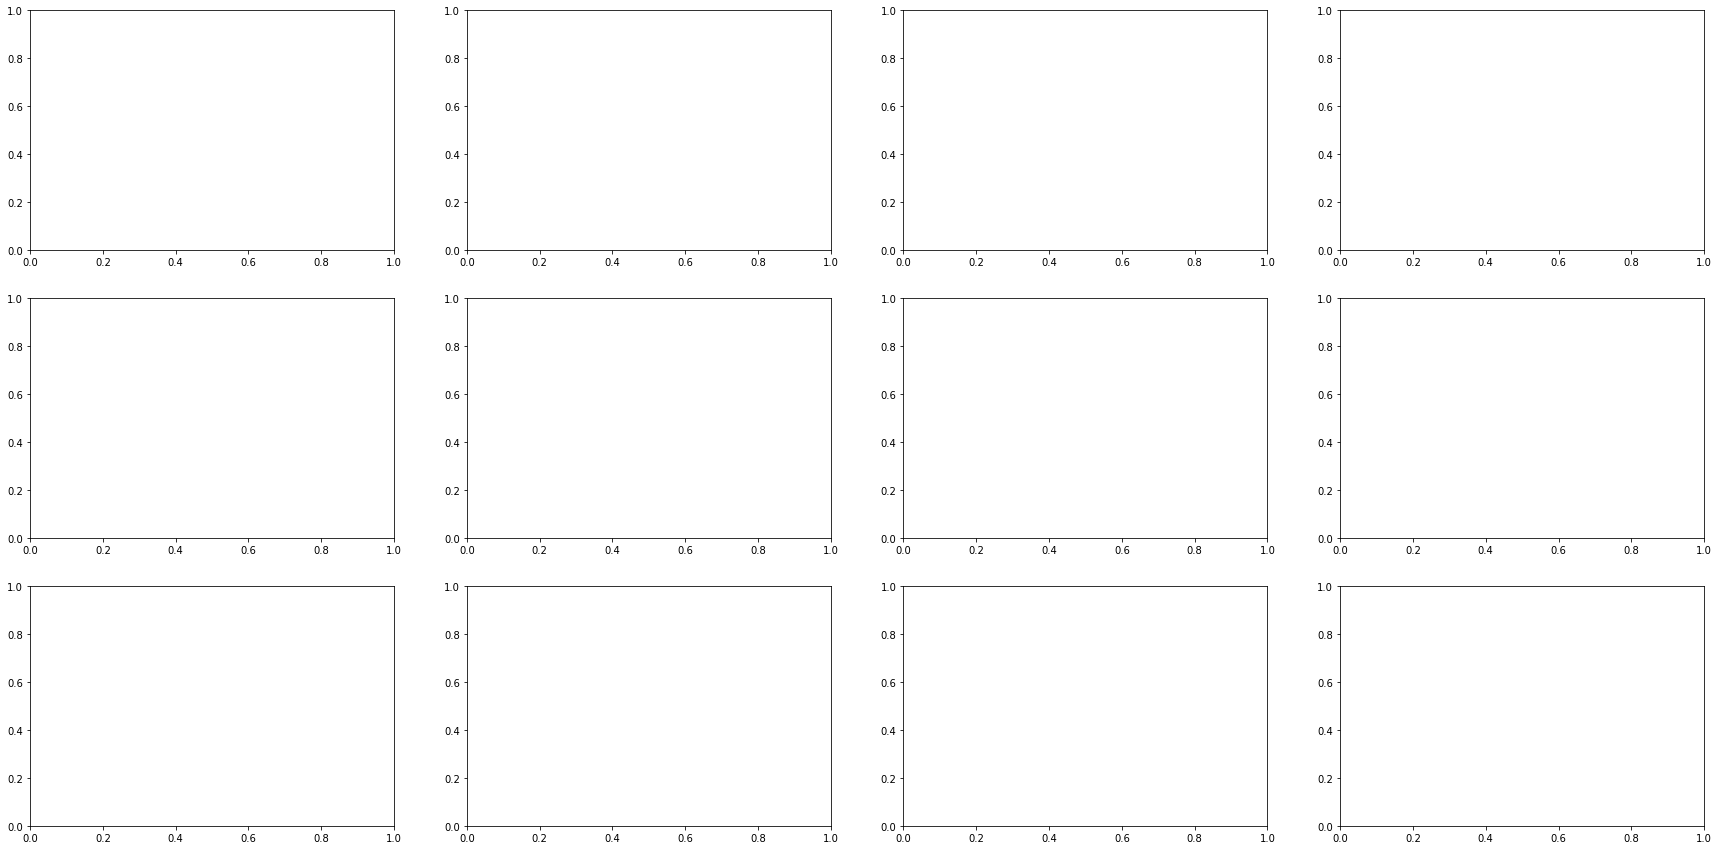

In [5]:
####### NORMALITAT #######

# Mètodes gràfics 
def render_normality_histograms():
    n_rows = 3
    n_cols = 4
    n_bars = 30
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
    for i, row_axes in enumerate(axes):
        for j, ax in enumerate(row_axes):
            idx = i*n_cols + j

            attr = df_cols[idx]
            ax.set_xlabel(attr)      

            data = wine_df[attr].sort_values()
            ax.hist(data, bins=n_bars, density=True)

            norm = stats.norm.pdf(data, np.mean(data), np.std(data))
            ax.plot(data, norm) 
    plt.show()
    
def render_normality_table():
    (anderson_true, anderson_false) = test_normality_anderson()
       
    anderson = merge_normality_results(anderson_true, anderson_false)
    
    normality_res = pd.DataFrame([anderson, shapiro, dagostino],
                                 index=["Test Anderson-Darling"])
    normality_res.columns.name = "Segueix distribució normal?"
    display(normality_res)
        
        
# Mètodes numèrics
def test_normality_anderson(p_value_threshold=PVAL_THRESHOLD, render=False):
    normal_attrs = []
    non_normal_attrs = []
    for attr_key in wine_df:
        attr = wine_df[attr_key].values
        res = stats.anderson(attr, dist='norm')
        stat = res.statistic
        threshold = res.critical_values[2] #0.05 significance == PVAL_THRESHOLD
        if stat > threshold:
            normal_attrs.append(attr_key)
        else:
            non_normal_attrs.append(attr_key)
            
    if render:
        print_attrs_distributions(normal_attrs, non_normal_attrs)
        
    return (normal_attrs, non_normal_attrs)

    
def print_attrs_distributions(normal, non_normal):
    print("Atributs amb distribució normal: {}".format(normal))
    print("Atributs amb distribució no normal: {}".format(non_normal))

    
def merge_normality_results(normal, non_normal):
    dict_normal = {k: '✓' for k in normal}
    dict_non_normal = {k: '✗' for k in non_normal}
    
    #inplace_merging
    dict_normal.update(dict_non_normal)    
    return dict_normal

render_normality_histograms()
render_normality_table()

<font color="#1111aa">
    <p>
        Si observem els resultats de les proves sobre normalitat d'Anderson-Darling, de Saphiro-Wilk i el basat en els test de D'Agostino i Pearson, tots els atributs segueixen una distribució normal. ...
        ....
        ...
    </p>
    <h1>TODO</h1>
    </font>

In [ ]:
####### HOMOGENEITAT VARIANCIA #######

# Levene és util si la normalitat no està asegurada
def levene_test(threshold=PVAL_THRESHOLD):
    res = stats.levene(*wine_df.as_matrix(), center='median') # Expand matrix to n parameters with '*'
    return res.pvalue
#     return res
    p = res.pvalue
    pprint(("Levene", p))
    return p > threshold

def fligner_test(threshold=PVAL_THRESHOLD):
    res = stats.fligner(*wine_df.as_matrix(), center='median') # Expand matrix to n parameters with '*'
    return res.pvalue
#     return res
    p = res.pvalue
    pprint(("Flinger", p))
    return p > threshold


variance_tests = [levene_test(), fligner_test()]
are_equal = [p > PVAL_THRESHOLD for p in variance_tests]

display(pd.DataFrame(
    {
        'Populations with equal variances?': are_equal,
        'p-value': variance_tests
    },
    index=['Levene test', 'Flinger test']
).T)


<font color="darkblue">
<h1>TODO</h1>
    </font>

### 4.3. Aplicació de proves estadístiques per comparar els grups de dades. En funció de les dades i de l’objectiu de l’estudi, aplicar proves de contrast d’hipòtesis, correlacions, regressions, etc.

<font color="darkblue">
<p>Per aplicar diferents estudis sobre les dades, hem definit dues preguntes a respondre: *Quines característiques determinen la qualitat del vi?* i *Es pot inferir, a partir de la característica més importat, la qualitat del vi?*
 </font>

    
### Quines característiques determinen la qualitat del vi?

<font color="darkblue">
<br><p>
La primera aproximació per determinar quines variables tenen més pes sobre la qualitat final és cercar si existeix una correlació entre els atributs i la qualitat i quin és el pes de cadascun.
    </p>
</font>

In [ ]:
# Mirem les correlacions entre els atributs i la qualitat
data = np.ndarray(shape=(len(df_cols), 2))
for i in range(len(df_cols)):
    attr = df_cols[i]
    data[i] = stats.pearsonr(wine_df[attr], wine_df['quality'])
df_pearson = pd.DataFrame(data, index=df_cols, columns=['estimació', 'p-valor'])[:11]
df_pearson['tmp_sort'] = df_pearson['estimació'].abs()
df_pearson = df_pearson.sort_values(by='tmp_sort', ascending=False).drop('tmp_sort', axis=1)

# Format output
# pprint(df_pearson['estimació'].values)
df_pearson['estimació'] = ["{0:.4f}".format(el) for el in df_pearson['estimació'].values]
df_pearson['p-valor'] = ["{0:.2e}".format(el) for el in df_pearson['p-valor'].values]
display(df_pearson.T)

<font color="#1111aa">
    <p>
        Hem ordenat els atributs dels que més impacten a l'hora de determinar la qualitat als que menys. Tal i com podem observar, la qualitat augmenta gairebé un 50% segons el volum d'**alcohol** que tenim en el vi. Per altra banda, el 40% de quantitat d'**acidesa volàtil** influeix negativament en la qualitat. És a dir, com més sàpiga a vinagre, pitjor.
    </p>
    <p>
        Seguidament tenim que el 25% de la quantitat de **sulfats** augmenten la qualitat. Sembla obvi, doncs aquest component ajuda a que el vi no s'oxidi i impideix l'aparició de bactèries. Però per altra banda, paradoxalment,el **SO2 total i el lliure** resten qualitat al vi (un 18'5%  i un 5% de la seva quantitat, respectivament). 
    </p>
    <p>
        L'**àcid cítric** suma el 22'6% del seu valor i podem deduïr que un vi que sigui més fresc afavoreix a obtenir una millor nota. Per altra banda, quan menys dens és el vi -menys líquid- pitjor la seva qualitat, restant un 17'5% del valor de la **densitat**. La quantitat de **clorurs** també afecta negativament, restant casi un 13% del seu valor: quant més salat estigui el vi, pitjor qualitat tindrà. Per altra banda, el valor del **sucre** només suma un 1'4% del seu valor. No ens ha de resultar xocant doncs estem parlant de vins negres i aquests no acostumen a ser dolços (tret que siguin escumosos, però no és el cas d'aquests). 
    </p>
    <p>
        Darrerament, tenim que el **pH**, que resta un 5% del seu valor a la qualitat final. És a dir, com més àcid sigui un vi, pijtor encara que no compti molt. Però, per altra banda, l'**acidesa fixa** suma a la qualitat del vi un 12'4% del seu valor. 
    </p>
    <p>
        Pel que fa als p-valors, podem descartar tots aquells atributs que superin el llindar de 0.05. Només el sucre supera aquest llindar i, per tant, no el fariem servir en un model de regresió lineal.
    </p>
</font>
    

In [ ]:
# Correlació dels atributs
pd.plotting.scatter_matrix(wine_df.iloc[:, :11], figsize=(30,15))
plt.show()

<font color="#1111aa">
    <p>En el gràfic de correlacions entre parells d'atributs -considerant que són tots normals- podem veure clarament la relació directe que havíem explicat al principi entre el SO2 lliure i total: com més tenim d'un, més tenim de l'altre.</p>
     <p>
        Per altra banda, tenim atributs que es relacionen fortament entre sí. Per exemple, com més àcid cítric, més àcidesa fixa. Això ens fa pensar que pujant aquest dos paràmetres obtíndriem millor nota perquè, a més, com més àcidesa fixa, menys pH, que li resta qualitat. A més a més, com més àcid cítric, menys acidesa volàtil i, per tant, menys sabor a vinagre. Però tenim el problema que com més quantitat d'acidesa fixa, derivada de l'àcid cítric, augmentem també la seva densitat, que va en detriment de la qualitat. Com veiem, trobar els paràmetres físico-químics equilibrats per treure un vi de molt bona qualitat és una tasca força feixuga. 
    </p>
    <p>
        A continuació, construïrem un model de predicció. Será una combinació d'arbres de decisió entrenats amb *bagging* (usant mostreig amb reemplaçament), també conegut com **Random Forests**.
    </p>
</font>

In [ ]:
#Inserció d'atribut qualitatiu per la qualitat del vi
CLASSES_NAMES = ['Bad wine', 'Good wine']
GOOD_THRESHOLD = 6
raw_y = wine_df['quality'] >= GOOD_THRESHOLD

In [ ]:
def encode_raw_y(raw_y):    
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(raw_y)
    return y

def random_forest_preprocess_data(df, raw_y):
    #Input data
    X = df.drop(['quality'], axis=1)
    #Labels
    y = encode_raw_y(raw_y)
    return (X, y)

def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=RANDOM_SEED
    )
    return (X_train, X_test, y_train, y_test)

def display_precission(score):
    print("Precisió del model: {} %".format(round(score*100, 2)))

(X, y) = random_forest_preprocess_data(wine_df, raw_y)
(X_train, X_test, y_train, y_test) = split_train_test(X, y)

rfc_model = RandomForestClassifier(bootstrap=True, n_estimators = 150, n_jobs=8, random_state=RANDOM_SEED)
rfc_model.fit(X_train, y_train)

In [ ]:
rfc_score = rfc_model.score(X_test, y_test)
display_precission(rfc_score)
# pprint(rfc_model.feature_importances_)
importances_df = pd.DataFrame(
    rfc_model.feature_importances_,
    index=list(X_test),
    columns=['Importància']
)
importances_df = importances_df.sort_values(by="Importància", ascending=False)
display(importances_df.T)

<font color="darkblue">
    <p>Com podem veure, la importància que otorga als atributs el nostre model basat en boscos aleatoris (*Random Forests*) són bastant semblants als obtinguts en la correlació lineal, sent l'alcohol el de major pes i el sucre residual el que menys. No em de confondre els pesos que dona el *random forest* als atributs (on la seva suma és 1) amb els factors donats en la correlació lineal amb la qualitat.
    </p>
    <p>
        Per altra banda, obtenim una precisió prou alta encara que una mica per sota del llindar del 80% al que estem acostumats a donar per bo el model. Hem de tenir en compte que un model complexe com són els *Random Forests* millora la seva precisió com més gran és el seu conjunt d'entrenament. Per tant, podem asegurar que utilizant les dades dels vins de collites d'altres anys -recordem que estem fent servir només l'any 2009- millorarem la precisió de manera que aquest model podrà determinar de forma més exacte la qualitat de vins futurs.
    </p>
    <p>
        Una vegada hem realitzat aquestes diferents proves i anàlisis, podem dir clarament que la característica amb més pes per determinar la qualitat del vi, sorprenentment, és el nivell d'alcohol.
    </p>
    </font>

### Es pot inferir, a partir del volum d'alcohol, la qualitat del vi?
<font color="darkblue">
<br>Per tractar de respondre a aquesta pregunta, analitzarem la relació entre les dimensions `alcohol ~ qualitat` i, si escau, crearem un model de regressió lineal per tal de veure com es relacionen.
    </font>

In [ ]:
alcohol_quality_df = wine_df[['alcohol', 'quality']]

fig, ax = plt.subplots(1, 1, figsize=(25, 7))
ax.scatter(alcohol_quality_df['alcohol'], alcohol_quality_df['quality'])
ax.set_xlabel('Graduació alcoholica')
ax.set_ylabel('Qualitat')
plt.show()

<font color="darkblue">
Com podem observar, en aquest cas és obvi que sobre aquestes dades no es pot aplicar un model de regressió lineal, ja que el resultat serà de molt baixa qualitat. Això és degut a que la variable qualitat és discreta, i no continua. Tanmateix, s'observa una mena de diagonal que podria fer-nos intuïr qua la qualitat augment així com ho fa la graduació alcoholica. En cas de voler realitzar una regressió lineal amb les eines usades en aquest exercici, s'hauria d'implementar un codi molt semblant al descrit a la [documentació de sklearn](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

Creiem que, com que ja disposem d'un model per inferir la qualitat del vi, el que podriem fer és tractar d'entrenar el model només amb la graduació alcoholica i analitzar-ne el comportament.</font>

In [ ]:
(X_alcohol_train, X_alcohol_test, y_alcohol_train, y_alcohol_test) = split_train_test(alcohol_quality_df['alcohol'], encode_raw_y(raw_y))
X_alcohol_train = X_alcohol_train.values.reshape(-1, 1)
X_alcohol_test = X_alcohol_test.values.reshape(-1, 1)

rfc_alcohol_model = RandomForestClassifier(bootstrap=True, n_estimators = 150, n_jobs=8, random_state=RANDOM_SEED)
rfc_alcohol_model.fit(X_alcohol_train, y_alcohol_train)
rfc_alcohol_score = rfc_alcohol_model.score(X_alcohol_test, y_alcohol_test)

display_precission(rfc_alcohol_score)

<font color="darkblue">
Notem com la precissió ha caigut considerablement, com era d'esperar. A més, també hem de tenir present que encara que 67% no sembli un valor especialment baix, no és gaire vàlid. Donat que estam intentant modelar sobre dues classes, un classificador aleatori ens haurà de donar un 50% de precisió, així que aquest és el nostre punt de partida. 
</font>

### TODO: Respondre realment a la pregunta



## 5. Representació dels resultats a partir de taules i gràfiques.

<font color="darkblue"><br>Durant les diferents etapes de neteja i anàlisi hem mostrat les taules i gràfiques adients per entendre el comportament de les accions. Tot i això, a continuació inserim una sèrie de gràfiques addicionals que permeten obtenir encra més coneixement del conjunt de dades.</font>

### Anàlisi de normalitat

In [ ]:
def plot_qq(keys):
    if keys is None:
        keys = list(wine_df)
        
    cols = 4
    rows = math.ceil(len(keys)/cols)
    plt.figure(figsize=(25, 7))
    for i, attr_key in enumerate(keys):
        plt.subplot(rows, cols, i+1)
        attr = wine_df[attr_key]
        stats.probplot(attr, dist="norm", plot=plt)
    plt.show()

plot_qq(['alcohol', 'density', 'quality'])

<font color="darkblue">La gràfica Q-Q és molt usada per comprovar la normalitat d'una sèries de dades. Tanmateix, amb la informació trobada a l'apartat 4.2 ha sigut suficient per veure la normalitat de les dades, així que aquesta implementaicó ha quedat relegada a una mena d'appendix.</font>

### Arbre de decisió

<font color="darkblue">Seleccionat una mostra aleatòria dels 250 arbres del *RandomForest*, observam com l'arbre de decisió és relativament complex. Tot i això, renderitzar-lo és una bona manera de seguir les decissions que aquests pren en funció de les dades d'entrada. Per simplificar el model visualment, podem generar un nou *RandomForest* definit una profunditat màxima dels arbres. Així, òbviament perdrem qualitat de predicció, però és un bon exercici acadèmic.</font>

In [ ]:
def render_tree(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,  
                    filled=True, rounded=True,
                    class_names=CLASSES_NAMES,
                    feature_names=list(wine_df.drop(columns='quality')),
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [ ]:
# Render random forest sample tree
sample_tree = np.random.choice(rfc_model.estimators_)
render_tree(sample_tree)


In [ ]:
rfc_model_basic_trees = RandomForestClassifier(max_depth=3, bootstrap=True, n_estimators = 150, n_jobs=8, random_state=RANDOM_SEED)
rfc_model_basic_trees.fit(X_train, y_train)

sample_tree = np.random.choice(rfc_model_basic_trees.estimators_)
render_tree(sample_tree)

print("Precisió del model: {} %".format(round(rfc_model_basic_trees.score(X_test, y_test)*100, 2)))

<font color="darkblue">Ara sí, podem avaluar i seguir fàcilment les decisions que pren aquest nou model. Sorprenentment observem com la precisió del conjunt del random forest no ha baixat gaire, i es situa en un 71.25%, només 7.5 punts per sota del model original.</font>

### Matriu de confusió

<font color="darkblue"><br>Una altra eina molt útil a l'hora d'avaluar moldes de regressió és la matriu de confusió. Aquesta ens mostra, per cada classe, el nombre de Vertaders positius (*TP*), Falsos postius (*FP*), Vertaders Negatius (*TN*) i Falsos negatius (*FN*).</font>

In [ ]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriu de confusió',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
y_pred = rfc_model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, CLASSES_NAMES, normalize=True)

<font color="darkblue">
Podem observar com les prediccions, tant encertades com errònies estan molt equilibrades, així que no sembla que cap de les dues classes sigui un factor determinant a l'hora d'usar el model generat. Això és degut a que el *threshold* definit per dir si un vi és bo o dolent és molt proper a la mitjana i coincideix amb la mediana.</font>

## 6. Resolució del problema. A partir dels resultats obtinguts, quines són les conclusions? Els resultats permeten respondre al problema?

<font color="#1111aa">
    <p>Com hem pogut veure al llarg de tot el document, tots els atributs presents ajuden a determinar la qualitat del vi. Tot i això, hem observat com atributs com els atributs d'alcohol, sulfats o l'acidesa volàtil ténen més pes a la qualitat del vi. A més, aquesta idea ha estat doblement validada, ja que hem descobert aquesta informació mitjançant l'anàlisi de correlacions i mitjançant el *Random Forest*.
    </p>
    <p>
        Per altre costat, hem pogut veure que podem predir la qualitat del vi a partir de l'alcohol amb una precisió del 67%. Tot i que hi ha estudis que donen per bones precisions per sobre del 60%, el nostre llindar és a partir del 80% de precisió per considerar un model com fiable. Per tant, s'hauran de recórrer a més atributs per poder predir la qualitat de forma linial.
    </p>
    <p>
        Per altra banda, gràcies a respondre les preguntes originals, també hem pogut construir un model de predicció bastant robust que pot classificar els vins entre bons i, diguem-ne, no tant bons, amb una fiabilitat de gairebé el 79%. Com ja s'ha comentat, si a aquest model li donem dades d'anys posteriors a l'any 2009 per entrenar-se, obtíndrem un classificador molt fiable per determinar la qualitat del vins d'enguany.
    </p>
    </font>

## 7. Codi: Cal adjuntar el codi, preferiblement en R, amb el que s’ha realitzat la neteja, anàlisi i representació de les dades. Si ho preferiu, també podeu treballar en Python

<font color="darkblue">
Tot el codi emprat en aquesta pràctica es pot trobar en les diferens preguntes en les cel·les precedides amb `In [ ]` i es poden executar des de jupyter o qualsevol terminal interactiva de Python.
    </font>